# K-Means Clustering Approach

#### Load Data and spaCy Model

In [2]:
import pandas as pd

Execute this block for all data:

In [3]:
data = pd.read_pickle("../data/02_All_Decreased_Filesize.pkl")

Execute this block for the Frequent Committers Subset:

In [4]:
data = pd.read_pickle('../data/03_Subset_Frequent_Committers.pkl')

In [5]:
data.head(3)

,message,author_email,project
0,Fixed an error happening when the memory stats...,michele.simionato@gmail.com,gem_oq-engine
1,Updated setup.py [skip CI],michele.simionato@gmail.com,micheles_decorator
2,Fixed an exposure test [skip hazardlib],michele.simionato@gmail.com,gem_oq-engine


In [6]:
import spacy

nlp = spacy.load("en_core_web_sm")

#### Take a Subset

In [7]:
# Taking a subset has not any influence when training on the frequent committer dataset since it has less then 100000 samples

subset_size = 100000

messages = data["message"][:subset_size].tolist()

#### Build Document Vectors

In [8]:
vectors = []

docs = nlp.pipe(messages)

for doc in docs:
    vectors.append(doc.vector)

## Clustering the Subset with K-Means

#### Training

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(100)
kmeans.fit(vectors)
kmeans_prediction = kmeans.predict(vectors)

#### Evaluation

In [10]:
#import warnings
#warnings.filterwarnings('ignore')

import sys
sys.path.append('..')

from util.k_means import k_means_summary

k_means_summary = k_means_summary(kmeans_prediction, kmeans.n_clusters, data)
k_means_summary

,Number of Messages,Number of different Authors,Average number of commits per different Author,Most common Author,Number of different Projects,Average number of commits per different Project,Most common project
0,432.0,35.0,12.342857,"('P.Rudiger@ed.ac.uk', 104)",86.0,5.023256,"('pyviz_holoviews', 97)"
1,848.0,41.0,20.682927,"('mitchell.hashimoto@gmail.com', 120)",129.0,6.573643,"('lxc_lxd', 76)"
2,1815.0,27.0,67.222222,"('michele.simionato@gmail.com', 1474)",45.0,40.333333,"('gem_oq-engine', 1682)"
3,1619.0,41.0,39.487805,"('mike@silverorange.com', 303)",165.0,9.812121,"('silverorange_swat', 302)"
4,262.0,34.0,7.705882,"('igor.kroitor@gmail.com', 92)",58.0,4.517241,"('ccxt_ccxt', 92)"
...,...,...,...,...,...,...,...
95,561.0,37.0,15.162162,"('igor.kroitor@gmail.com', 117)",104.0,5.394231,"('ccxt_ccxt', 117)"
96,303.0,7.0,43.285714,"('github@contao.org', 256)",13.0,23.307692,"('contao_contao', 256)"
97,2245.0,42.0,53.452381,"('palehose@gmail.com', 266)",225.0,9.977778,"('saltstack_salt', 379)"
98,659.0,34.0,19.382353,"('igor.kroitor@gmail.com', 490)",52.0,12.673077,"('ccxt_ccxt', 490)"


In [11]:
print(f"There are {len(data['author_email'].unique())} different authors.")
print(f"There are {len(data['project'].unique())} different projects.")

There are 42 different authors.
There are 774 different projects.


In [12]:
k_means_summary.describe()

,Number of Messages,Number of different Authors,Average number of commits per different Author,Number of different Projects,Average number of commits per different Project
count,100.000000,100.00000,100.000000,100.000000,100.000000
mean,683.250000,27.65000,29.349671,90.520000,12.766430
std,413.384463,13.09204,22.134515,57.606025,18.349966
min,88.000000,1.00000,5.333333,2.000000,2.750000
25%,328.750000,17.50000,18.182927,37.500000,5.389155
50%,619.500000,32.50000,25.135397,90.000000,6.579815
75%,981.250000,39.00000,32.787946,135.500000,10.857080
max,2245.000000,42.00000,180.666667,225.000000,135.500000


In [13]:
from util.k_means import print_k_means_classes

print_k_means_classes(kmeans_prediction, kmeans.n_clusters, data[:][:subset_size])


________________ Class 0 ________________

___
1) 
Added method SourceFilter.get_nsites
___
2) 
Added decorator vectorize_arg
___
3) 
Fixed ucerf_td test
___
4) 
Added property OqParam.ext_loss_types
___
5) 
Added method BaseSeismicSource.to_xml
___
6) 
Ported some GMPE test
___
7) 
Optimized the PointSource rtree filtering
___
8) 
Introduced function valid.namelists
___
9) 
Removed logic tree reduction in event based risk
___
10) 
Added two other docstrings
_________________

Number of messages in this class: 432
Most common author:
('P.Rudiger@ed.ac.uk', 104)
Most common project:
('pyviz_holoviews', 97)



________________ Class 1 ________________

___
1) 
Do not update source_info.num_sites if there are too many sources [skip hazardlib]
___
2) 
Temporarily restore rvolc=0
___
3) 
lxd/device/proxy: Dont allow proxy_protocol to be set when in nat mode
___
4) 
lxd/cluster/membership: Run EventsUpdateListeners in NotifyHeartbeat in wait group

So function doesn't return until its done,

A kmeans model was trained on the vectors spacy calculates for each document.

This clustering approach can detect some commonalities in between the commit messages. For example, in one cluster all messages include the tag &lt;I>, in others there is always something that is fixed, some always have an URL or a file path and also lengths and sentence structure can be equal in classes sometimes.

That is why one could argue that messages in one resulting cluster of k-means should have approximately equal quality.

## Finding the best number of clusters

Idea: Use the "Elbow method" to calculate the best fitting number of cluster centers.

https://github.com/Hassaan-Elahi/Writing-Styles-Classification-Using-Stylometric-Analysis

This method aims at finding out where the sum of the squared distances from each point to its assigned cluster centroid is minimal.

Thus, it can be argued that this provides the best possible clustering outcome.

In [ ]:
inertia = []
K = range(100, 200, 100)

for k in K:
    kmeans = KMeans(k)
    kmeans.fit(vectors)
    inertia.append(kmeans.inertia_)

# takes about 30s per iteration on M1 MacBook Air

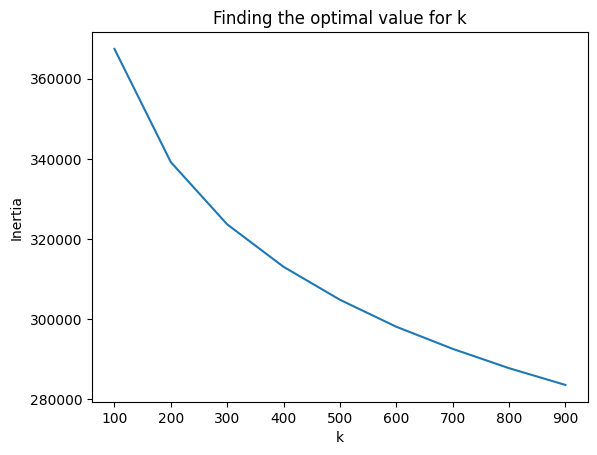

In [ ]:
import matplotlib.pyplot as plt

plt.plot(K, inertia)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Finding the optimal value for k')
plt.show()